In [1]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
raw_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
raw_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

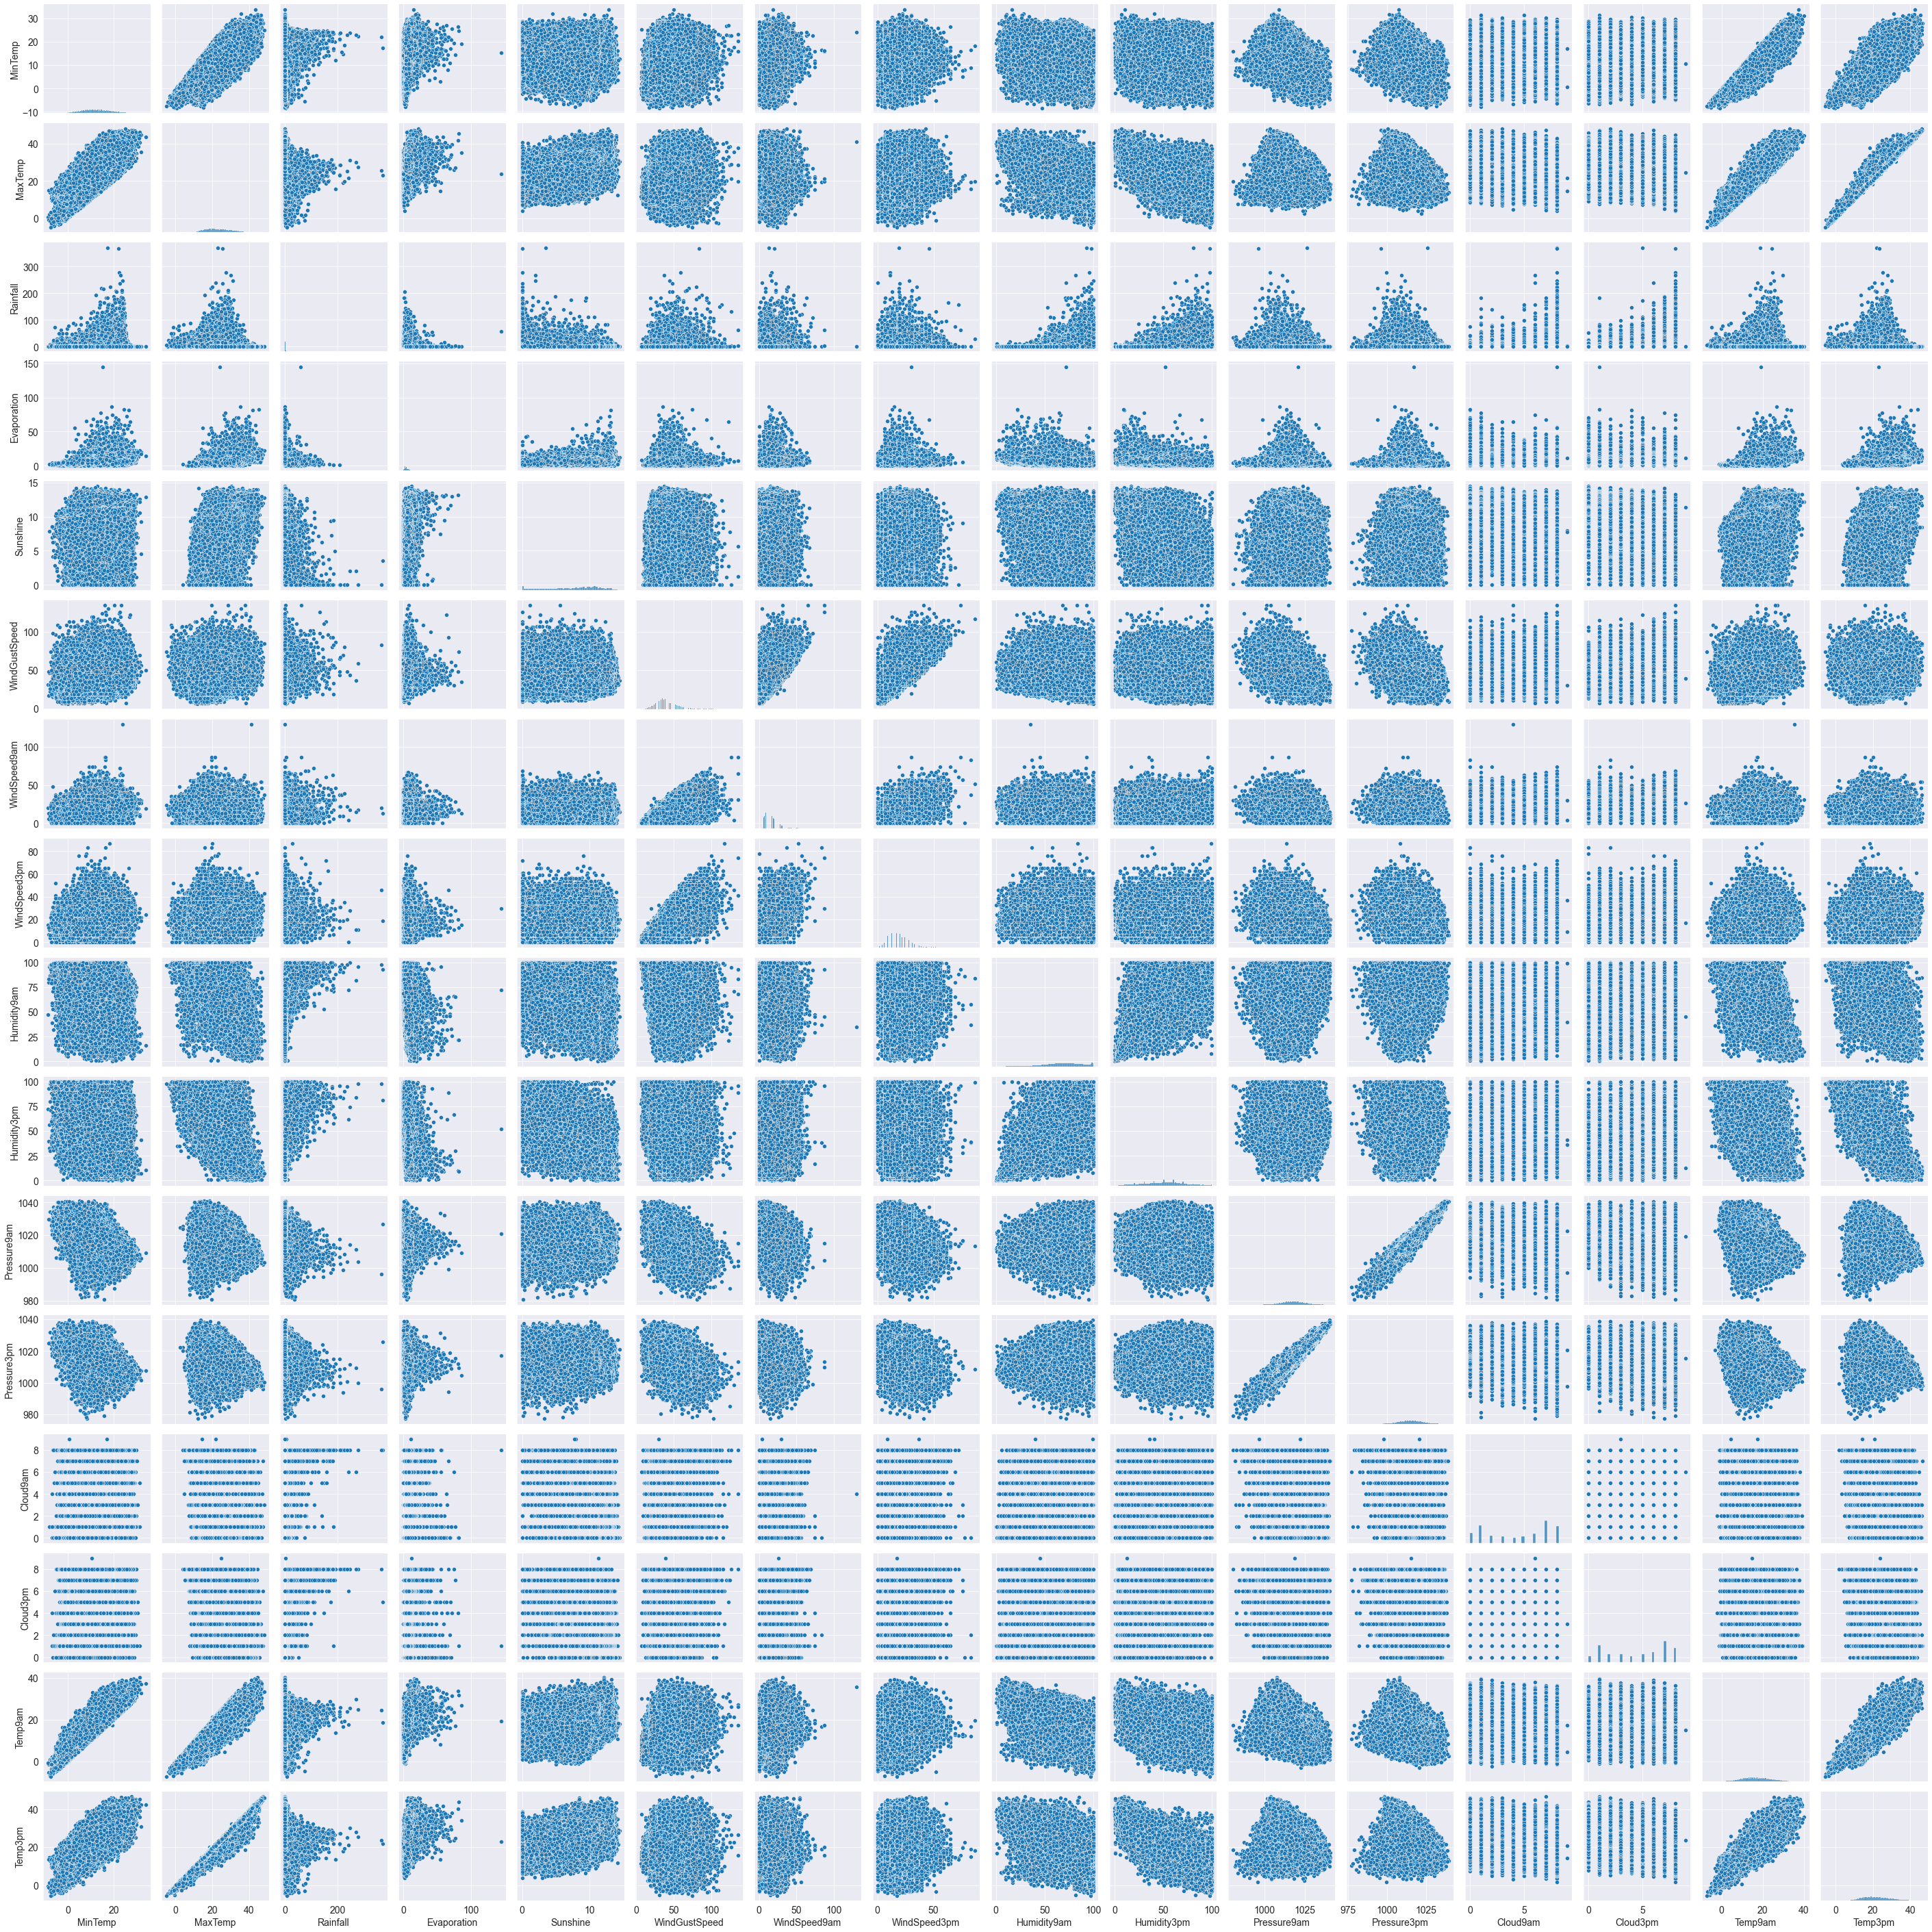

In [6]:
sns.pairplot(data= raw_df);

In [6]:
raw_df.dropna(subset= ["RainTomorrow"], inplace= True)

# Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

# Training, Validation and Test Sets

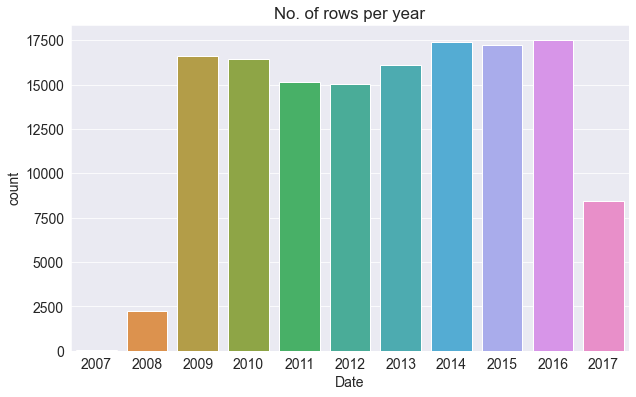

In [7]:
plt.title("No. of rows per year")
sns.countplot(x= pd.to_datetime(raw_df.Date).dt.year);

In [8]:
year= pd.to_datetime(raw_df.Date).dt.year
year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 142193, dtype: int64

In [9]:
train= raw_df[year< 2015]
val= raw_df[year== 2015]
test= raw_df[year> 2015]

In [10]:
print("Train shape: ", train.shape)
print("Val shape: ", val.shape)
print("Test shape: ", test.shape)

Train shape:  (98988, 23)
Val shape:  (17231, 23)
Test shape:  (25974, 23)


# Input and Target Columns
Let's identify the input and target columns.

In [11]:
input_cols= list(train.columns)[1:-1]
target_col= "RainTomorrow"

In [12]:
train_inputs= train[input_cols].copy()
train_targets= train[target_col].copy()

In [13]:
val_inputs= val[input_cols].copy()
val_targets= val[target_col].copy()

In [14]:
test_inputs=  test[input_cols].copy()
test_targets= test[target_col].copy()

Let's also identify the numeric and categorical columns.

In [15]:
numeric_cols= train_inputs.select_dtypes(include= np.number).columns.tolist()
categorical_cols= train_inputs.select_dtypes("object").columns.tolist()

In [16]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [17]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


# Imputing missing numeric values

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer= SimpleImputer(strategy= "mean").fit(raw_df[numeric_cols])

In [20]:
train_inputs[numeric_cols]= imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]= imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]= imputer.transform(test_inputs[numeric_cols])

In [21]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling Numeric Features

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler= MinMaxScaler().fit(raw_df[numeric_cols])

In [24]:
train_inputs[numeric_cols]= scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]= scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]= scaler.transform(test_inputs[numeric_cols])

In [25]:
test_inputs[numeric_cols].describe().loc[["min", "max"]]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.016509  0.000000  0.000000          0.0  0.000000       0.007752   
max  0.941038  0.984877  0.606469          1.0  0.972414       0.883721   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min           0.0      0.000000         0.04         0.03     0.024793   
max           1.0      0.747126         1.00         1.00     0.988430   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am  Temp3pm  
min       0.0000  0.000000  0.000000  0.000000      0.0  
max       0.9504  0.888889  0.888889  0.945148      1.0

# Encoding Categorical Data

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder= OneHotEncoder(sparse= False, handle_unknown= "ignore").fit(raw_df[categorical_cols])

In [28]:
encoded_cols= list(encoder.get_feature_names_out(categorical_cols))

In [29]:
train_inputs[encoded_cols]= encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]= encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]= encoder.transform(test_inputs[categorical_cols])

In [30]:
test_inputs.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498   Albury  0.681604  0.801512  0.000000     0.037723  0.525852   
2499   Albury  0.693396  0.725898  0.001078     0.037723  0.525852   
2500   Albury  0.634434  0.527410  0.005930     0.037723  0.525852   
2501   Albury  0.608491  0.538752  0.042049     0.037723  0.525852   
2502   Albury  0.566038  0.523629  0.018329     0.037723  0.525852   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498         ENE       0.372093        NaN        ESE      0.000000   
2499         SSE       0.341085        SSE         SE      0.069231   
2500         ENE       0.325581        ESE        ENE      0.084615   
2501         SSE       0.255814         SE        SSE      0.069231   
2502         ENE       0.193798         SE        SSE      0.046154   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498      0.080460         0.46         0.17     0.543802       0.5136   
2499      0.195402         0.54         0.30     0.505785       0.5008   
2500      0.448276         0.62         0.67     0.553719       0.6032   
2501      0.195402         0.74         0.65     0.618182       0.6304   
2502      0.103448         0.92         0.63     0.591736       0.5888   

      Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498  0.777778  0.333333  0.702532  0.808061        No                0.0   
2499  0.888889  0.888889  0.675105  0.712092        No                0.0   
2500  0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501  0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502  0.888889  0.888889  0.514768  0.529750       Yes                0.0   

      Location_Albany  Location_Albury  Location_AliceSprings  \
2498              0.0              1.0                    0.0   
2499              0.0              1.0                    0.0   
2500              0.0              1.0                    0.0   
2501              0.0              1.0                    0.0   
2502              0.0              1.0                    0.0   

      Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
2498                     0.0                0.0               0.0   
2499                     0.0                0.0               0.0   
2500                     0.0                0.0               0.0   
2501                     0.0                0.0               0.0   
2502                     0.0                0.0               0.0   

      Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
2498                0.0              0.0                0.0             0.0   
2499                0.0              0.0                0.0             0.0   
2500                0.0              0.0                0.0             0.0   
2501                0.0              0.0                0.0             0.0   
2502                0.0              0.0                0.0             0.0   

      Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
2498                    0.0                0.0              0.0   
2499                    0.0                0.0              0.0   
2500                    0.0                0.0              0.0   
2501                    0.0                0.0              0.0   
2502                    0.0                0.0              0.0   

      Location_GoldCoast  Location_Hobart  Location_Katherine  \
2498                 0.0              0.0                 0.0   
2499                 0.0              0.0                 0.0   
2500                 0.0              0.0                 0.0   
2501                 0.0              0.0                 0.0   
2502                 0.0              0.0                 0.0   

      Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
2498                  0.0                 0.0                        0.0   
2499                  

In [31]:
x_train= train_inputs[numeric_cols + encoded_cols]
x_val= val_inputs[numeric_cols + encoded_cols]
x_test= test_inputs[numeric_cols + encoded_cols]

In [32]:
x_train.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.516509  0.523629  0.001617     0.037723  0.525852       0.294574   
1  0.375000  0.565217  0.000000     0.037723  0.525852       0.294574   
2  0.504717  0.576560  0.000000     0.037723  0.525852       0.310078   
3  0.417453  0.620038  0.000000     0.037723  0.525852       0.139535   
4  0.613208  0.701323  0.002695     0.037723  0.525852       0.271318   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0      0.153846      0.275862         0.71         0.22     0.449587   
1      0.030769      0.252874         0.44         0.25     0.497521   
2      0.146154      0.298851         0.38         0.30     0.447934   
3      0.084615      0.103448         0.45         0.16     0.613223   
4      0.053846      0.229885         0.82         0.33     0.500826   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0       0.4800  0.888889  0.500352  0.508439  0.522073                0.0   
1       0.4912  0.493021  0.500352  0.514768  0.570058                0.0   
2       0.5056  0.493021  0.222222  0.594937  0.548944                0.0   
3       0.5712  0.493021  0.500352  0.533755  0.612284                0.0   
4       0.4624  0.777778  0.888889  0.527426  0.673704                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              1.0                    0.0   
1              0.0              1.0                    0.0   
2              0.0              1.0                    0.0   
3              0.0              1.0                    0.0   
4              0.0              1.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   
1                     0.0                0.0               0.0   
2                     0.0                0.0               0.0   
3                     0.0                0.0               0.0   
4                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   
1                0.0              0.0                0.0             0.0   
2                0.0              0.0                0.0             0.0   
3                0.0              0.0                0.0             0.0   
4                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   
1                    0.0                0.0              0.0   
2                    0.0                0.0              0.0   
3                    0.0                0.0              0.0   
4                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 0.0   
1                 0.0              0.0                 0.0   
2                 0.0              0.0                 0.0   
3                 0.0              0.0                 0.0   
4                 0.0              0.0                 0.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   
1                  0.0                 0.0                        0.0   
2                  0.0                 0.0                        0.0   
3                  0.0                 0.0                        0.0   
4                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   
1               0.0             0.0                    0.0   
2               0.0             0.0                    0.0 

# Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

# Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model= DecisionTreeClassifier(random_state= 42)

In [35]:
model.fit(x_train, train_targets)

DecisionTreeClassifier(random_state=42)

# Evaluation

Let's evaluate the decision tree using the accuracy score.

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
train_preds= model.predict(x_train)

In [38]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [39]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [40]:
train_probs= model.predict_proba(x_train)

In [41]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [42]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

In [43]:
model.score(x_val, val_targets)

0.7921188555510418

In [44]:
val_targets.value_counts()/ len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

# Visualization

We can visualize the decision tree _learned_ from the training data.

In [45]:
from sklearn.tree import plot_tree, export_text

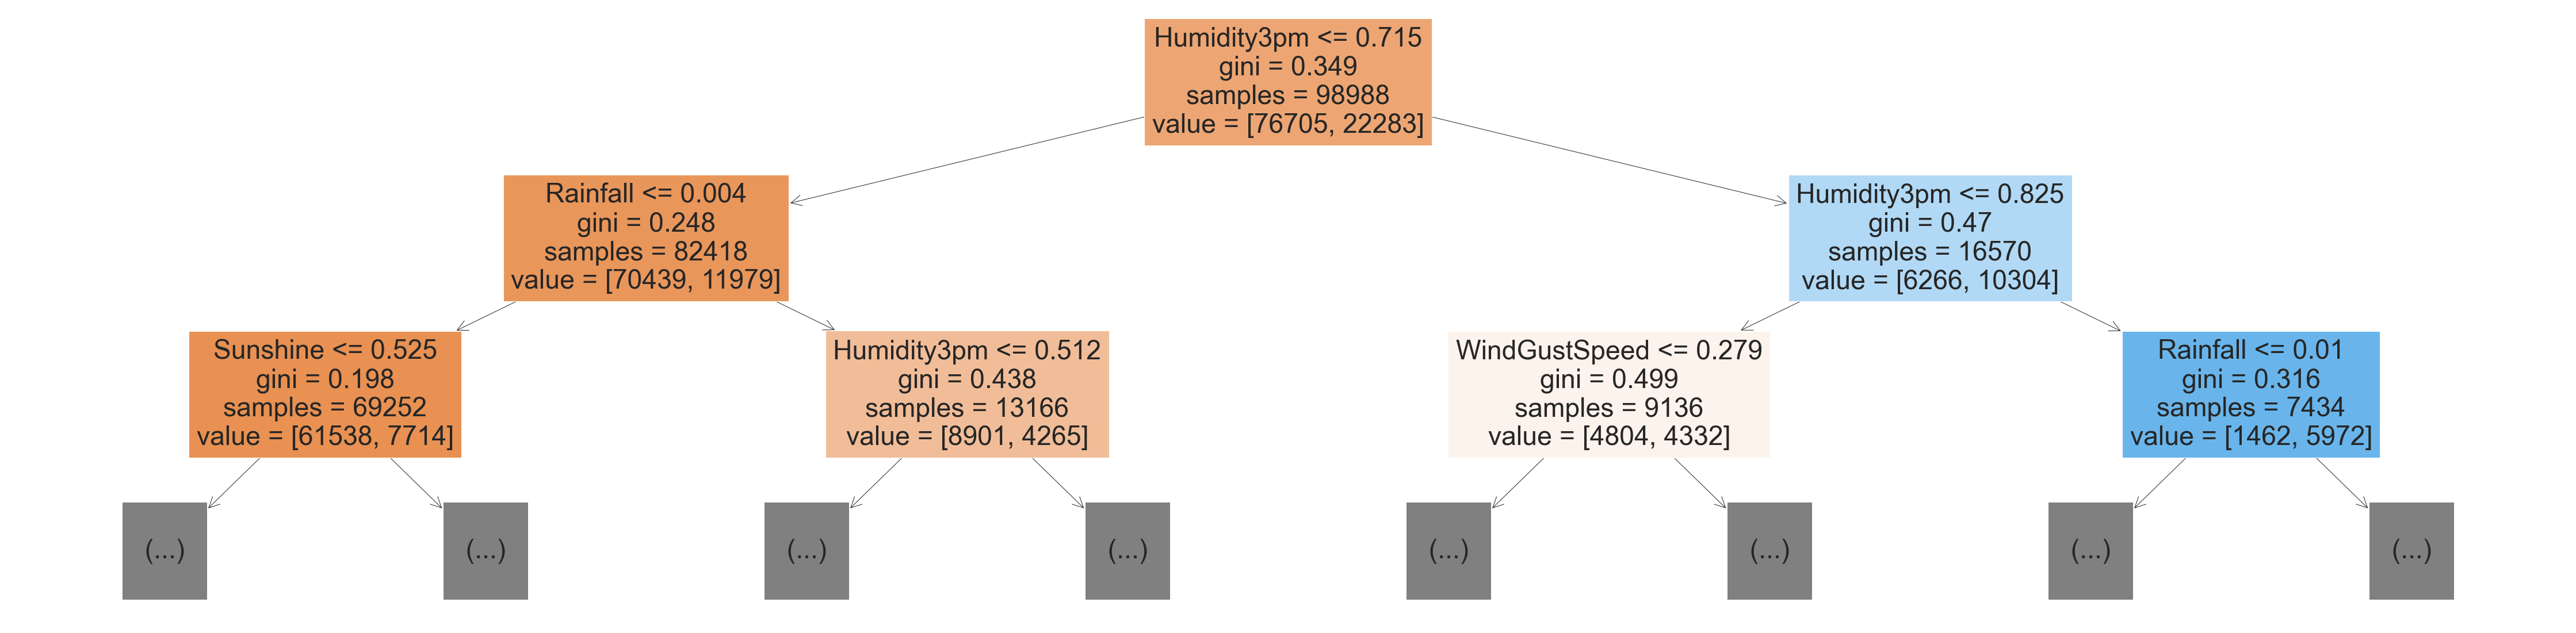

In [46]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names= x_train.columns, max_depth= 2, filled= True);

In [47]:
model.tree_.max_depth

48

In [48]:
tree_text= export_text(model, max_depth= 10, feature_names= list(x_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

# Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [49]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

Let's turn this into a dataframe and visualize the most important features.

In [50]:
importance_df= pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending= False)

In [51]:
importance_df.head()

Feature  Importance
9     Humidity3pm    0.261441
11    Pressure3pm    0.062057
2        Rainfall    0.059139
5   WindGustSpeed    0.056333
4        Sunshine    0.049465

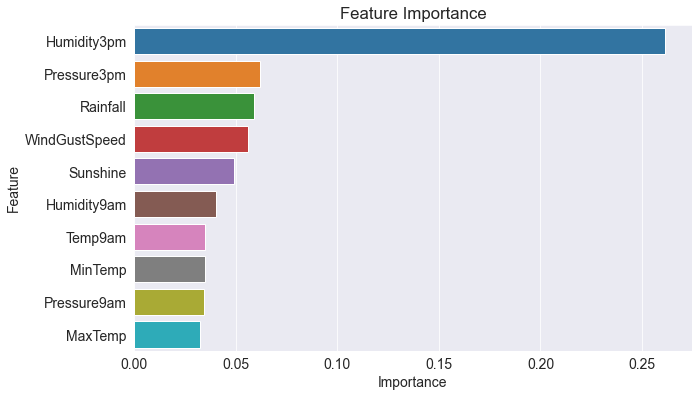

In [52]:
plt.title("Feature Importance")
sns.barplot(data= importance_df.head(10), x= "Importance", y= "Feature");

# Hyperparameter Tuning and Overfitting

### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [53]:
model= DecisionTreeClassifier(max_depth= 3, random_state= 42)

In [54]:
model.fit(x_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [55]:
model.score(x_train, train_targets)

0.8291308037337859

In [56]:
model.score(x_val, val_targets)

0.8334397307178921

In [57]:
model.classes_

array(['No', 'Yes'], dtype=object)

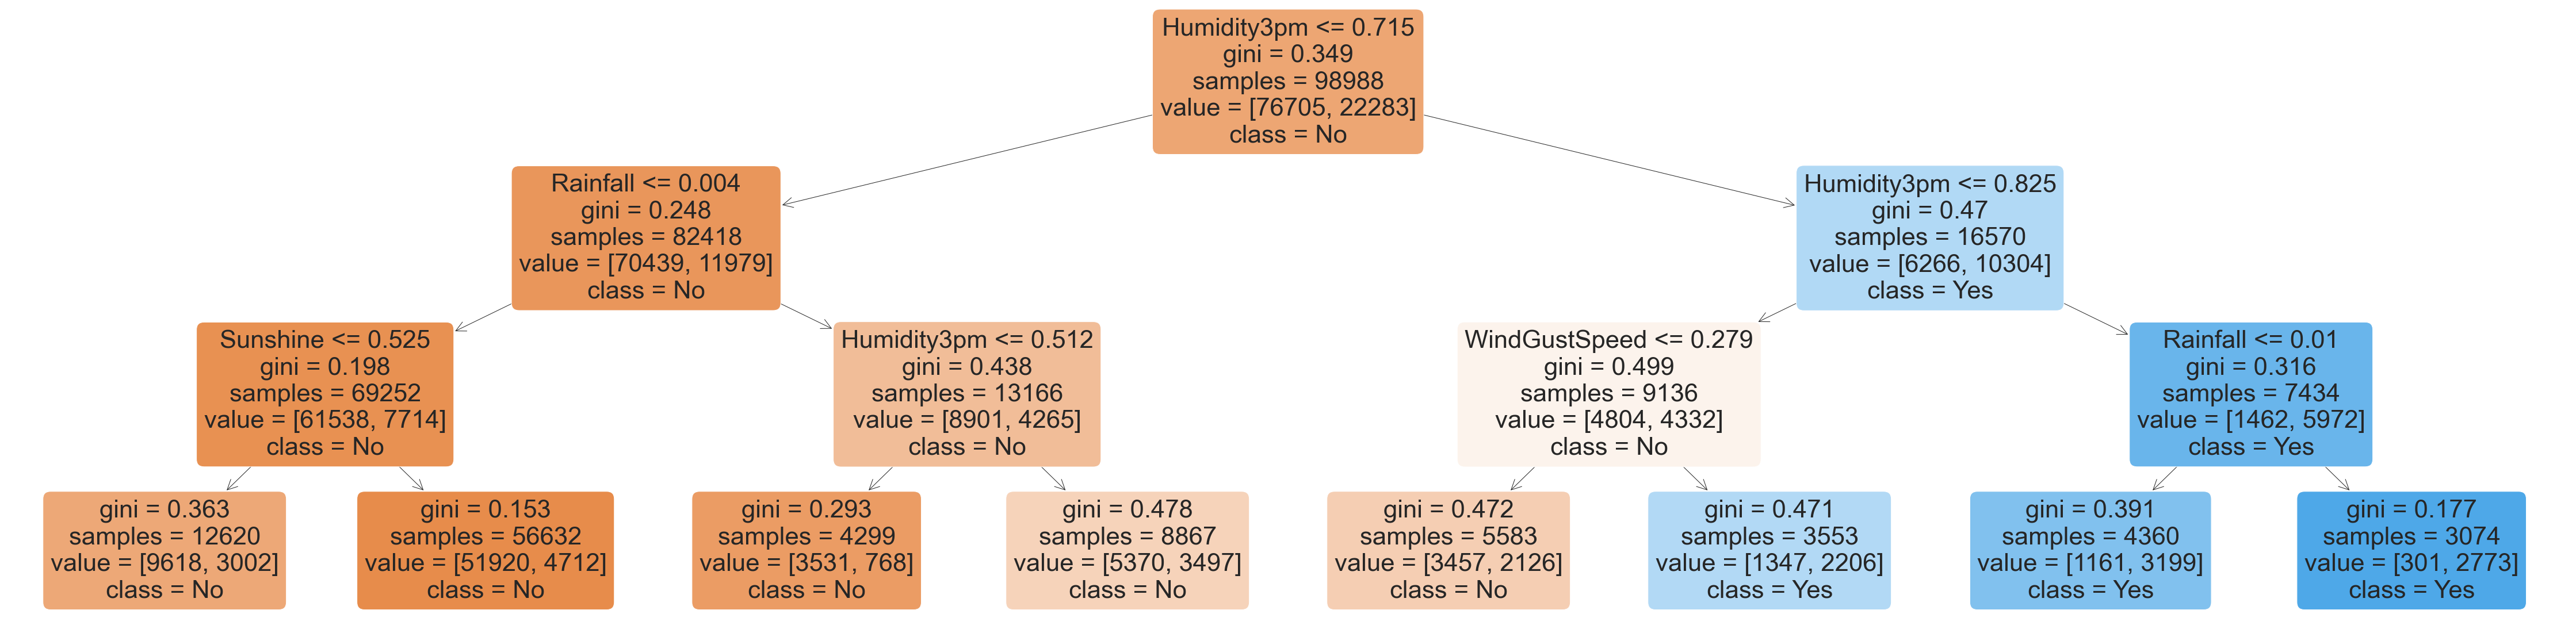

In [58]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names= x_train.columns, filled= True, rounded= True, class_names= model.classes_);

In [59]:
print(export_text(model, feature_names= list(x_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [60]:
def max_depth_error(md):
    model= DecisionTreeClassifier(max_depth= md, random_state= 42)
    model.fit(x_train, train_targets)
    train_acc= 1- model.score(x_train, train_targets)
    val_acc= 1- model.score(x_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [61]:
%%time
errors_df= pd.DataFrame([max_depth_error(md) for md in range(1,21)])

Wall time: 36.9 s


In [62]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156271          0.157275
6           7        0.153312          0.154605
7           8        0.147806          0.158029
8           9        0.140906          0.156578
9          10        0.132945          0.157333
10         11        0.123227          0.159248
11         12        0.113489          0.160815
12         13        0.101750          0.163833
13         14        0.089981          0.167373
14         15        0.078999          0.171261
15         16        0.068180          0.174279
16         17        0.058138          0.176890
17         18        0.048733          0.181243
18         19        0.040025          0.187569
19         20        0.032539          0.190297

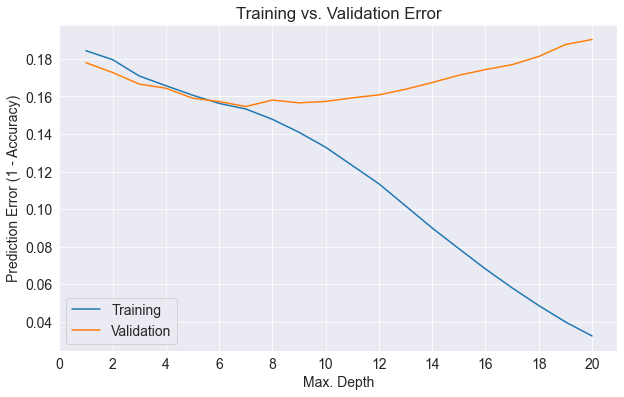

In [63]:
plt.plot(errors_df["Max Depth"], errors_df["Training Error"])
plt.plot(errors_df["Max Depth"], errors_df["Validation Error"])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])
plt.show()

In [64]:
model= DecisionTreeClassifier(max_depth= 7, random_state= 42).fit(x_train, train_targets)
model.score(x_val, val_targets)

0.8453949277465034

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [65]:
model= DecisionTreeClassifier(max_leaf_nodes= 128, random_state= 42)

In [66]:
model.fit(x_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [67]:
model.score(x_train, train_targets)

0.8480421869317493

In [68]:
model.score(x_val, val_targets)

0.8442342290058615

In [69]:
model.tree_.max_depth

12

In [70]:
model_text= export_text(model, feature_names= list(x_train.columns))
print(model_text)

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

In [71]:
def max_leaf_error(ml):
    model= DecisionTreeClassifier(max_leaf_nodes= ml, random_state= 42)
    model.fit(x_train, train_targets)
    train_acc= 1- model.score(x_train, train_targets)
    val_acc= 1- model.score(x_val, val_targets)
    return {"Max Leaf Nodes": ml, "Training error": train_acc, "Validation error": val_acc}

In [72]:
%%time
error_df= pd.DataFrame([max_leaf_error(ml) for ml in range(50,120)])

Wall time: 1min 38s


In [73]:
error_df

Max Leaf Nodes  Training error  Validation error
0               50        0.156847          0.157043
1               51        0.156847          0.157043
2               52        0.156847          0.157043
3               53        0.156827          0.157275
4               54        0.156827          0.157275
5               55        0.156322          0.156926
6               56        0.156080          0.156868
7               57        0.156080          0.156868
8               58        0.156080          0.156868
9               59        0.156080          0.156868
10              60        0.156080          0.156868
11              61        0.156080          0.156868
12              62        0.156080          0.156868
13              63        0.156080          0.156868
14              64        0.155989          0.156752
15              65        0.155989          0.156752
16              66        0.155989          0.156752
17              67        0.155989          0.156752
18              68        0.155989          0.156752
19              69        0.155989          0.156752
20              70        0.155989          0.156752
21              71        0.155989          0.156752
22              72        0.155989          0.156752
23              73        0.155989          0.156752
24              74        0.155938          0.157101
25              75        0.155938          0.157101
26              76        0.155938          0.157101
27              77        0.155938          0.157101
28              78        0.155938          0.157101
29              79        0.155413          0.157159
30              80        0.155413          0.157159
31              81        0.155413          0.157159
32              82        0.155332          0.157043
33              83        0.155191          0.156288
34              84        0.154463          0.155824
35              85        0.154463          0.155824
36              86        0.154362          0.155708
37              87        0.154362          0.155708
38              88        0.154362          0.155708
39              89        0.154362          0.155708
40              90        0.154362          0.155708
41              91        0.154362          0.155708
42              92        0.154362          0.155708
43              93        0.154362          0.155708
44              94        0.154362          0.155708
45              95        0.154190          0.155592
46              96        0.154180          0.155650
47              97        0.154180          0.155650
48              98        0.153998          0.155708
49              99        0.153998          0.155708
50             100        0.153998          0.155708
51             101        0.153766          0.156056
52             102        0.153493          0.155534
53             103        0.153493          0.155534
54             104        0.153150          0.155534
55             105        0.153150          0.155534
56             106        0.153150          0.155534
57             107        0.153150          0.155534
58             108        0.153150          0.155534
59             109        0.153150          0.155534
60             110        0.153150          0.155534
61             111        0.153059          0.155592
62             112        0.153059          0.155592
63             113        0.152817          0.155185
64             114        0.152584          0.155069
65             115        0.152584          0.155069
66             116        0.152584          0.155069
67             117        0.152584          0.155069
68             118        0.152453          0.155476
69             119        0.152453          0.155476

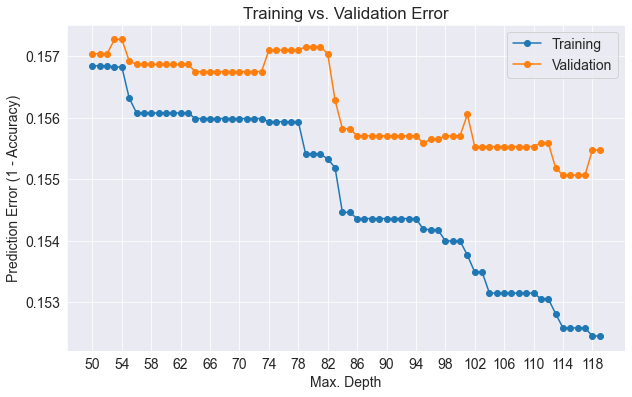

In [74]:
plt.plot(error_df["Max Leaf Nodes"], error_df["Training error"], marker= "o")
plt.plot(error_df["Max Leaf Nodes"], error_df["Validation error"], marker= "o")
plt.title('Training vs. Validation Error')
plt.xticks(range(50, 120, 4))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])
plt.show()

Max Leaf Nodes in range of 64- 67 gives least validation error

In [75]:
model= DecisionTreeClassifier(max_depth= 7, max_leaf_nodes= 65, random_state= 42)

In [76]:
model.fit(x_train, train_targets)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=65, random_state=42)

In [77]:
model.score(x_train, train_targets)

0.8440417020244878

In [78]:
model.score(x_val, val_targets)

0.8431315652022517

# Training a Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model= RandomForestClassifier(n_jobs=-1, random_state= 42)

In [81]:
%%time
model.fit(x_train, train_targets)

Wall time: 10.2 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [82]:
model.score(x_train, train_targets)

0.9999494888269285

In [83]:
model.score(x_val, val_targets)

0.8566537055307295

In [84]:
train_probs= model.predict_proba(x_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [85]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

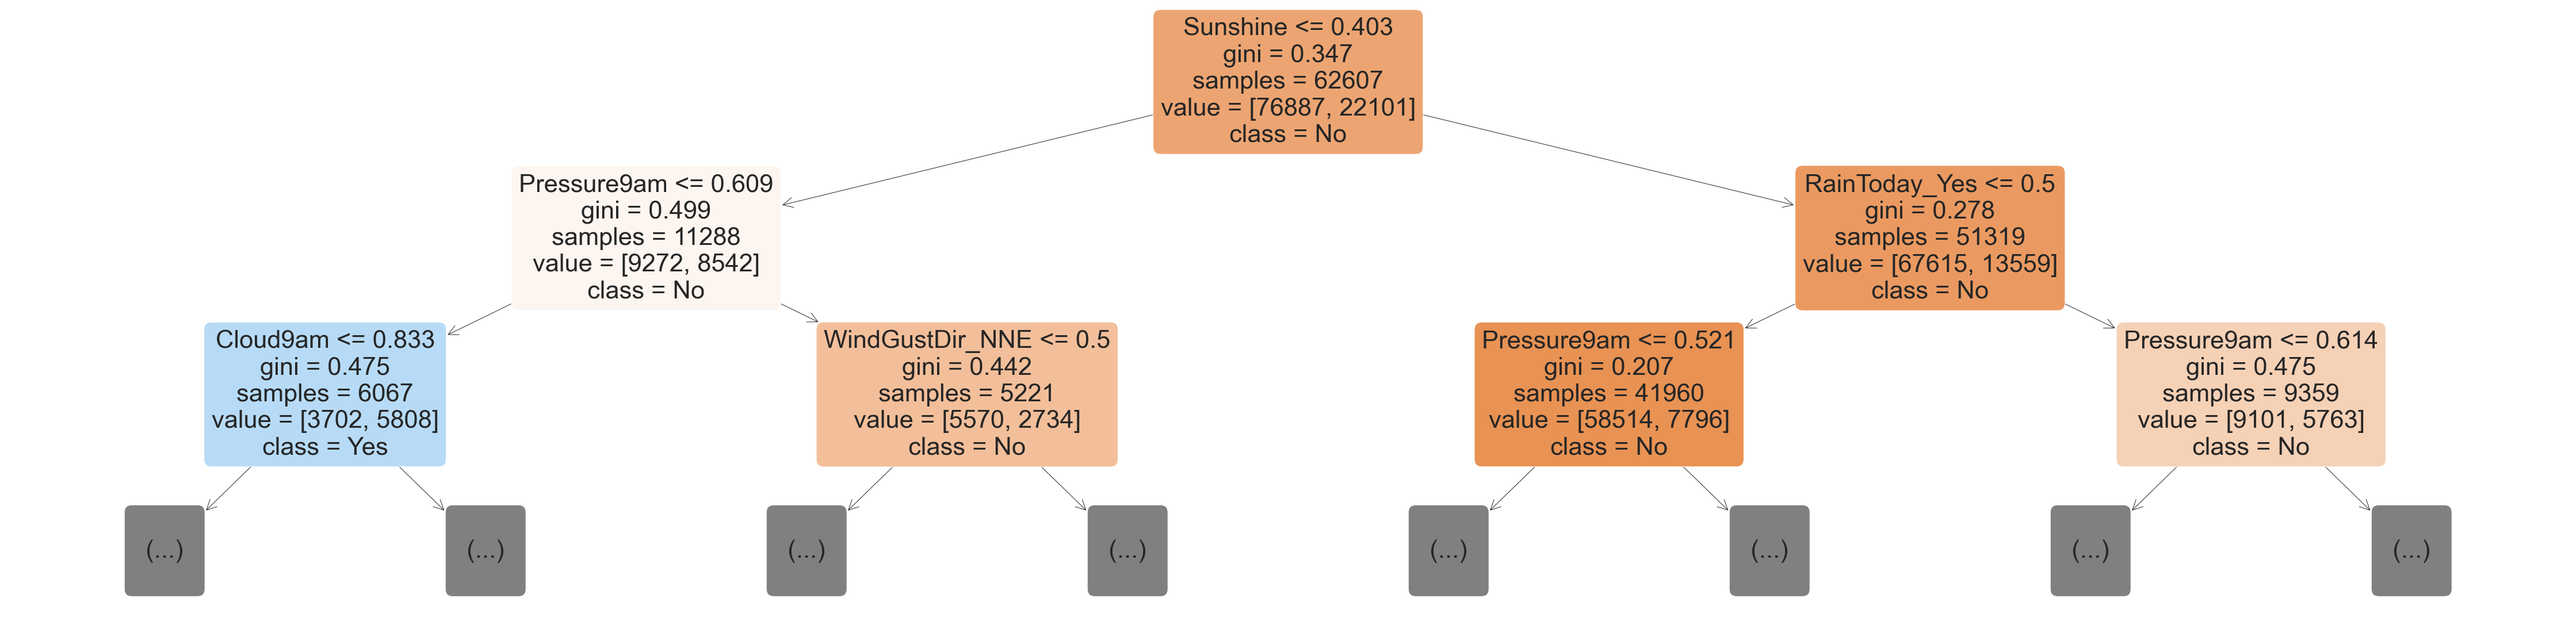

In [86]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth= 2, feature_names= x_train.columns, filled= True, rounded= True, class_names= model.classes_);

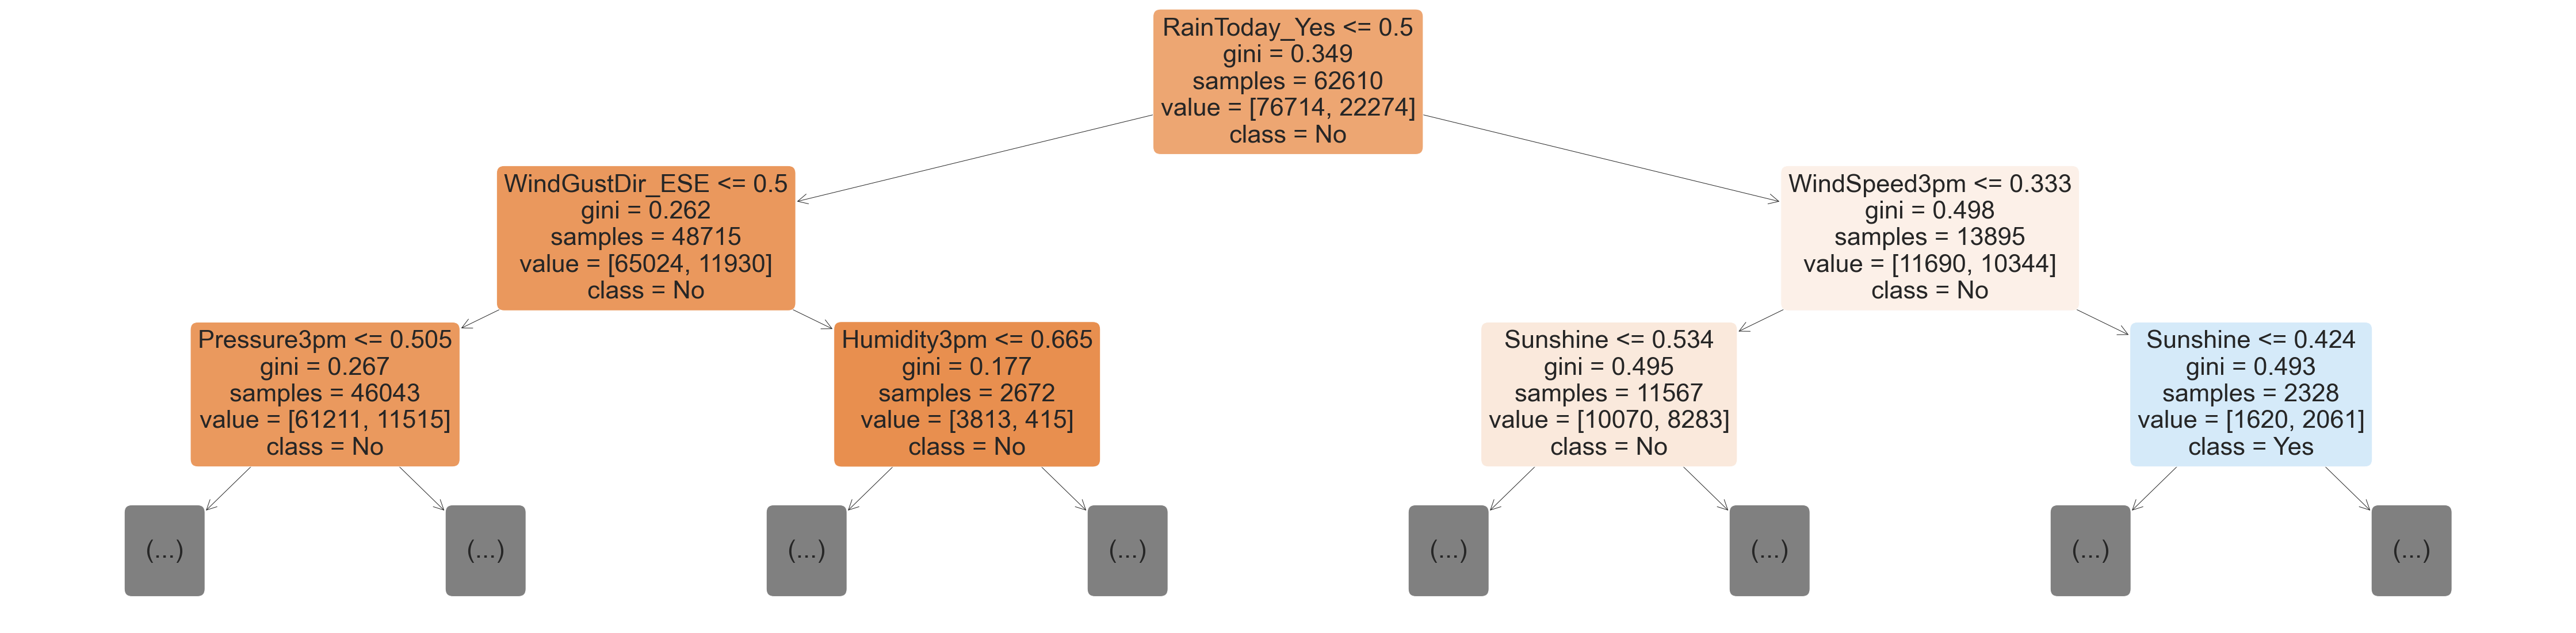

In [87]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth= 2, feature_names= x_train.columns, filled= True, rounded= True, class_names= model.classes_);

In [88]:
len(model.estimators_)

100

In [89]:
imp_df= pd.DataFrame({
    "feature": x_train.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending= False)

In [90]:
imp_df.head(10)

feature  importance
9     Humidity3pm    0.139904
4        Sunshine    0.053696
11    Pressure3pm    0.052713
8     Humidity9am    0.050051
2        Rainfall    0.048077
10    Pressure9am    0.047944
5   WindGustSpeed    0.047477
15        Temp3pm    0.044379
1         MaxTemp    0.041865
0         MinTemp    0.041199

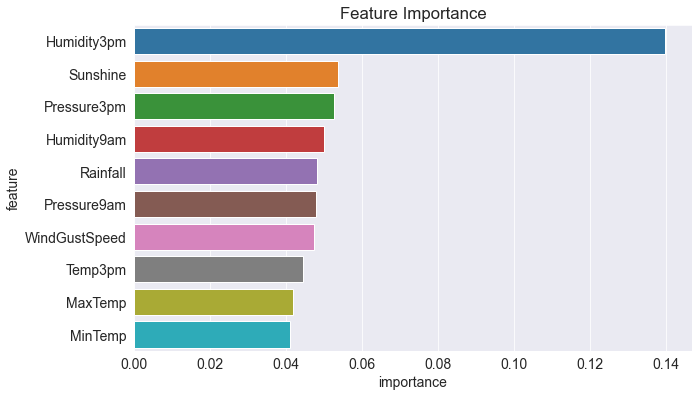

In [91]:
plt.title('Feature Importance')
sns.barplot(data= imp_df.head(10),x= "importance", y="feature");

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

In [92]:
base_model= RandomForestClassifier(n_jobs= -1, random_state= 42).fit(x_train, train_targets)

In [93]:
base_train_acc= base_model.score(x_train, train_targets)
base_val_acc= base_model.score(x_val, val_targets)

In [94]:
base_accs= base_train_acc, base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 


**10 estimators**

In [95]:
model= RandomForestClassifier(n_jobs= -1, n_estimators= 10, random_state= 42).fit(x_train, train_targets)

In [96]:
model.score(x_train, train_targets)

0.986958015112943

In [97]:
model.score(x_val, val_targets)

0.8485868492832686

In [98]:
model= RandomForestClassifier(n_jobs= -1, n_estimators= 500, random_state= 42).fit(x_train, train_targets)

In [99]:
model.score(x_train, train_targets)

0.9999797955307714

In [100]:
model.score(x_val, val_targets)

0.8577563693343393

In [101]:
def max_estimators(me):
    model= RandomForestClassifier(n_jobs= -1, random_state= 42, n_estimators= me)
    model.fit(x_train, train_targets)
    train_acc= model.score(x_train, train_targets)
    val_acc= model.score(x_val, val_targets)
    return {"Max Estimators": me, "Training error": train_acc, "Validation error": val_acc}

In [ ]:
%%time
error_df= pd.DataFrame([max_estimators(me) for me in range(100,700,10)])

In [103]:
error_df

Max Leaf Nodes  Training error  Validation error
0               50        0.156847          0.157043
1               51        0.156847          0.157043
2               52        0.156847          0.157043
3               53        0.156827          0.157275
4               54        0.156827          0.157275
5               55        0.156322          0.156926
6               56        0.156080          0.156868
7               57        0.156080          0.156868
8               58        0.156080          0.156868
9               59        0.156080          0.156868
10              60        0.156080          0.156868
11              61        0.156080          0.156868
12              62        0.156080          0.156868
13              63        0.156080          0.156868
14              64        0.155989          0.156752
15              65        0.155989          0.156752
16              66        0.155989          0.156752
17              67        0.155989          0.156752
18              68        0.155989          0.156752
19              69        0.155989          0.156752
20              70        0.155989          0.156752
21              71        0.155989          0.156752
22              72        0.155989          0.156752
23              73        0.155989          0.156752
24              74        0.155938          0.157101
25              75        0.155938          0.157101
26              76        0.155938          0.157101
27              77        0.155938          0.157101
28              78        0.155938          0.157101
29              79        0.155413          0.157159
30              80        0.155413          0.157159
31              81        0.155413          0.157159
32              82        0.155332          0.157043
33              83        0.155191          0.156288
34              84        0.154463          0.155824
35              85        0.154463          0.155824
36              86        0.154362          0.155708
37              87        0.154362          0.155708
38              88        0.154362          0.155708
39              89        0.154362          0.155708
40              90        0.154362          0.155708
41              91        0.154362          0.155708
42              92        0.154362          0.155708
43              93        0.154362          0.155708
44              94        0.154362          0.155708
45              95        0.154190          0.155592
46              96        0.154180          0.155650
47              97        0.154180          0.155650
48              98        0.153998          0.155708
49              99        0.153998          0.155708
50             100        0.153998          0.155708
51             101        0.153766          0.156056
52             102        0.153493          0.155534
53             103        0.153493          0.155534
54             104        0.153150          0.155534
55             105        0.153150          0.155534
56             106        0.153150          0.155534
57             107        0.153150          0.155534
58             108        0.153150          0.155534
59             109        0.153150          0.155534
60             110        0.153150          0.155534
61             111        0.153059          0.155592
62             112        0.153059          0.155592
63             113        0.152817          0.155185
64             114        0.152584          0.155069
65             115        0.152584          0.155069
66             116        0.152584          0.155069
67             117        0.152584          0.155069
68             118        0.152453          0.155476
69             119        0.152453          0.155476

In [ ]:
plt.plot(error_df["Max Estimators"], error_df["Training error"])
plt.plot(error_df["Max Estimators"], error_df["Validation error"])
plt.title('Training vs. Validation Error')
plt.xticks(range(10,700,10))
plt.xlabel("Max Estimators")
plt.xticks(range(50, 120, 4))
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])
plt.show()

### `max_depth` and `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.

In [105]:
def test_params(**params):
    model= RandomForestClassifier(random_state= 42, n_jobs= -1, **params).fit(x_train, train_targets)
    return model.score(x_train, train_targets), model.score(x_val, val_targets)

In [106]:
test_params(max_depth= 5)

(0.8197862367155615, 0.8240961058557251)

In [107]:
test_params(max_depth= 30)

(0.9934335475007071, 0.8549126574197667)

In [108]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

In [109]:
base_accs

(0.9999494888269285, 0.8566537055307295)

### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

<img src="https://i.imgur.com/FXGWMDY.png" width="720">

Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well. 

In [110]:
test_params(max_features= "log2")

(0.9999595910615429, 0.8558992513493123)

In [111]:
test_params(max_features= 3)

(0.9999494888269285, 0.8543323080494458)

In [112]:
test_params(max_features= 6)

(0.9999595910615429, 0.8558992513493123)

In [113]:
base_accs

(0.9999494888269285, 0.8566537055307295)

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [114]:
test_params(min_samples_split= 3, min_samples_leaf= 2)

(0.9625005051117307, 0.8565956705936975)

In [115]:
test_params(min_samples_split= 100, min_samples_leaf= 60)

(0.8495676243585081, 0.8451047530613429)

In [116]:
base_accs

(0.9999494888269285, 0.8566537055307295)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.

In [117]:
test_params(min_impurity_decrease= 1e-7)

(0.9996060128500425, 0.8561313910974406)

In [118]:
test_params(min_impurity_decrease= 1e-2)

(0.774891906089627, 0.7882885497069235)

In [119]:
base_accs

(0.9999494888269285, 0.8566537055307295)

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [120]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [121]:
base_accs

(0.9999494888269285, 0.8566537055307295)

In [122]:
test_params(max_samples= 0.9)

(0.9997676486038711, 0.8565376356566653)

In [123]:
base_accs

(0.9999494888269285, 0.8566537055307295)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [124]:
test_params(max_samples= 0.9)

(0.9997676486038711, 0.8565376356566653)

In [125]:
base_accs

(0.9999494888269285, 0.8566537055307295)

### `class_weight`

In [126]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [128]:
test_params(class_weight= "balanced")

(0.9999595910615429, 0.8553769369160235)

In [130]:
test_params(class_weight= {"No": 1, "Yes":2})

(0.9999595910615429, 0.8558412164122802)

In [131]:
base_accs

(0.9999494888269285, 0.8566537055307295)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [134]:
model= RandomForestClassifier(n_jobs= -1, max_depth= 30,
                             n_estimators= 500, max_features= 7,
                             random_state= 42, class_weight= {"No": 1, "Yes": 1.5})

In [135]:
model.fit(x_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [138]:
model.score(x_train, train_targets)

0.9920192346547057

In [139]:
model.score(x_val, val_targets)

0.8563054959085369

In [140]:
base_accs

(0.9999494888269285, 0.8566537055307295)

In [141]:
raw_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [148]:
def predict_input(model, single_input):
    input_df= pd.DataFrame([single_input])
    input_df[numeric_cols]= imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols]= scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols]= encoder.transform(input_df[categorical_cols])
    x_input= input_df[numeric_cols+encoded_cols]
    pred= model.predict(x_input)[0]
    prob= model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [149]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [150]:
predict_input(model, new_input)

('Yes', 0.7608595348304203)

In [151]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)